In [1]:
import pandas as pd
import numpy as np

# Forest Fires Prediction

## Introduction

The material of this mini-project is adopted from [Here](https://archive.ics.uci.edu/ml/datasets/Forest+Fires). The objective is to build a machine learning model to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: [Web Link](http://www3.dsi.uminho.pt/pcortez/forestfires/)).

## Attribute Information

1. **X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. **Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. **month** - month of the year: "jan" to "dec" 
4. **day** - day of the week: "mon" to "sun"
5. **FFMC** - FFMC index from the FWI system: 18.7 to 96.20
6. **DMC** - DMC index from the FWI system: 1.1 to 291.3
7. **DC** - DC index from the FWI system: 7.9 to 860.6
8. **ISI** - ISI index from the FWI system: 0.0 to 56.10
9. **temp** - temperature in Celsius degrees: 2.2 to 33.30
10. **RH** - relative humidity in %: 15.0 to 100
11. **wind** - wind speed in km/h: 0.40 to 9.40 
12. **rain** - outside rain in mm/m2 : 0.0 to 6.4 
13. **area** - the burned area of the forest (in ha): 0.00 to 1090.84 (this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform). 

- **FFMC** - fuel moisture of forest litter fuels under the shade of a forest canopy
- **DMC** - fuel moisture of decomposed organic material underneath the litter
- **DC** - drying deep into the soil
- **ISI** - fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential

## Loading the Data

In [2]:
data = pd.read_csv('dataset/forestfires.csv')

In [3]:
data.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
266,6,5,aug,tue,94.3,131.7,607.1,22.7,19.4,55,4.0,0.0,0.17
384,8,4,aug,sat,91.6,273.8,819.1,7.7,21.3,44,4.5,0.0,12.18
246,5,4,aug,sun,91.8,175.1,700.7,13.8,25.7,39,5.4,0.0,0.09
75,9,9,feb,thu,84.2,6.8,26.6,7.7,6.7,79,3.1,0.0,0.00
261,3,4,aug,fri,91.6,112.4,573.0,8.9,11.2,84,7.6,0.0,3.30


## Exploratory Data Analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


The observation shows that:
- Most of the columns are numeric features.
- There is no missing value in any column.

### Correlation

In [7]:
data.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


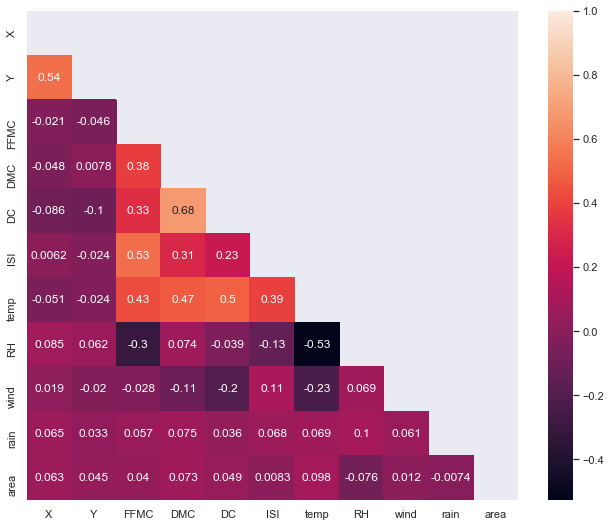

In [8]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
plt.figure(figsize=(11, 9))
sns.heatmap(data.corr(), mask=mask, annot=True);

All the columns seem to have a very low correlation to the target label.

### Outliers

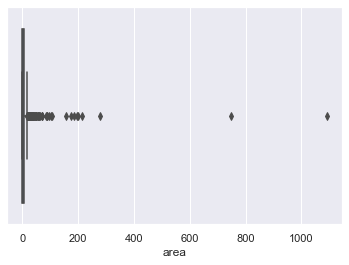

In [9]:
sns.boxplot(data['area']);

In [10]:
clean_data = data[data['area'] < data['area'].quantile(0.75)]

In [11]:
clean_data.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
442,6,5,apr,mon,87.9,24.9,41.6,3.7,10.9,64,3.1,0.0,3.35
335,4,3,sep,mon,91.6,108.4,764.0,6.2,9.8,86,1.8,0.0,0.00
141,1,2,aug,wed,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,0.55
323,3,5,sep,thu,90.7,136.9,822.8,6.8,12.9,39,2.7,0.0,2.18
328,6,5,sep,sat,92.2,102.3,751.5,8.4,19.7,35,1.8,0.0,0.00


In [12]:
print('Data: {} rows'.format(data.shape[0]))
print('Clean Data: {} rows'.format(clean_data.shape[0]))
print('Dropped: {} rows'.format(data.shape[0] - clean_data.shape[0]))

Data: 517 rows
Clean Data: 387 rows
Dropped: 130 rows


The plot shows that there are many outliers that their values are very far away from the median. I decide to take only the observations that have area value below the third quartile. I don't consider the first quartile because the value lies on exactly 0. Finally, 130 rows are dropped.

### Additional Information

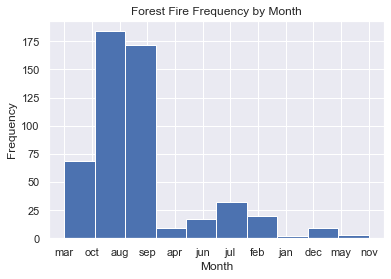

In [13]:
data['month'].hist()
plt.title('Forest Fire Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

In [14]:
cases_count = data.groupby('month')[['temp', 'RH', 'wind', 'rain']].mean()
cases_count['count'] = data['month'].value_counts()
cases_count.sort_values('count', ascending=False)

,temp,RH,wind,rain,count
month,,,,,
aug,21.631522,45.489130,4.086413,0.058696,184
sep,19.612209,42.843023,3.557558,0.000000,172
mar,13.083333,40.000000,4.968519,0.003704,54
jul,22.109375,45.125000,3.734375,0.006250,32
feb,9.635000,55.700000,3.755000,0.000000,20
jun,20.494118,45.117647,4.135294,0.000000,17
oct,17.093333,37.466667,3.460000,0.000000,15
apr,12.044444,46.888889,4.666667,0.000000,9
dec,4.522222,38.444444,7.644444,0.000000,9


From the observation, it can be seen that August and September have a 329,63% chance of forest fires cases than March. This can be explained by the fact that these months on average have more extreme weather conditions.

## Modeling

In [15]:
# Regressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
# Preprocessing
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
# Model Selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Scoring
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

Because there are many outliers, I consider using a model that insensitive to outliers. I will try some of these models below to find out which model performs the best, they are:
- SVR algorithm
- KNeighbors algorithm
- DecisionTree algorithm

### Train Test Split

In [16]:
X = clean_data.drop('area', axis=1)
y = clean_data['area']
Xt = X.drop(['month', 'day'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### Model Selection

In [18]:
estimators = {
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor()
}

trans = FunctionTransformer(np.log1p, np.expm1)

for name, estimator in estimators.items():
    cv = KFold(n_splits=10, shuffle=True, random_state=100)
    est = TransformedTargetRegressor(regressor=estimator, transformer=trans)
    scores = cross_val_score(est, Xt, trans.transform(y), cv=cv, scoring='neg_median_absolute_error')
    print('{}: {:.3f}'.format(name, scores.mean()))

SVR: -0.106
KNN: -0.389
DecisionTree: -0.404


From the evaluation, it seems that SVR performs the best. I'm using a negative median absolute error metric. Because the best value 0 is, a bigger score means a better model.

### Fitting model

In [19]:
class FeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    
    def fit(self, X, y=None):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        return self
    
    def transform(self, X):
        return X[self.columns]

In [20]:
est = Pipeline([
    ('features', FeaturesSelector(['temp', 'RH', 'wind', 'rain', 'ISI'])),
    ('regressor', TransformedTargetRegressor(GridSearchCV(SVR(), param_grid={'C': np.arange(0, 1.1, 0.1)},
                                                         scoring='neg_median_absolute_error',
                                                         cv=5, n_jobs=-1, verbose=1),
                                             FunctionTransformer(np.log1p, np.expm1)))
])
est.fit(X_train, trans.transform(y_train));

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.8s finished


I decide to use weather conditions and one other feature that has the highest correlation to the target. I fit the model with logarithm transformed target, here are something to consider about logarithm transform:
- The relationship between X and the mean of Y becomes linear.
- The target label becomes normally distributed.

### Scoring

In [21]:
y_pred = trans.inverse_transform(est.predict(X_test))
y_pred_train = trans.inverse_transform(est.predict(X_train))

In [22]:
pd.DataFrame({'Predict': y_pred, 'Test': y_test}).sample(5)

,Predict,Test
25,0.111060,0.00
61,0.112160,0.00
325,0.110921,0.00
307,0.111092,5.18
73,0.110641,0.00


It mostly predicts small fires, which are the majority.

In [23]:
pd.DataFrame({'Train Data': [median_absolute_error(y_train, y_pred_train),
                       mean_absolute_error(y_train, y_pred_train),
                       mean_squared_error(y_train, y_pred_train, squared=False)],
              
              'Test Data': [median_absolute_error(y_test, y_pred),
                       mean_absolute_error(y_test, y_pred),
                       mean_squared_error(y_test, y_pred, squared=False)]},
            
            index=['MedAE', 'MAE', 'RMSE'])

,Train Data,Test Data
MedAE,0.111267,0.111060
MAE,1.025722,0.770947
RMSE,1.902449,1.735142


- **Median Absolute Error (MedAE)**: The abbreviation for this metric is actually MAE. I use MedAE to differentiate it with Mean Absolute Error. This metric measures the median value of the distance between the real data and the predicted data.
- **Mean Absolute Error (MAE)**: This measures the absolute average distance between the real data and the predicted data, but it fails to punish large errors in prediction.
- **Mean Square Error (MSE)**: This measures the squared average distance between the real data and the predicted data.

[Read more](https://www.kaggle.com/c/home-data-for-ml-course/discussion/143364)